# 100DaysOfBytewise Machine Learning Fellowship

### Implementing K-Means Clustering on Customer Segments
## Task: 
#### Apply K-Means clustering to the Mall Customers dataset to segment customers based on their annual income and spending score. Visualize the resulting clusters.


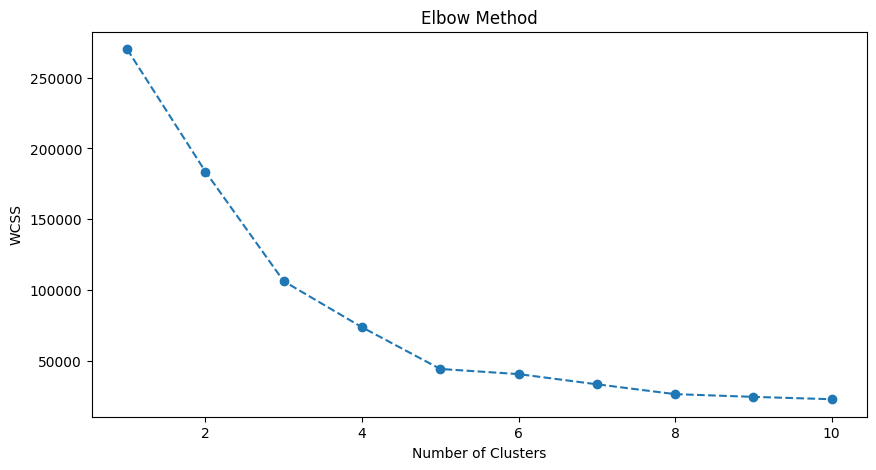

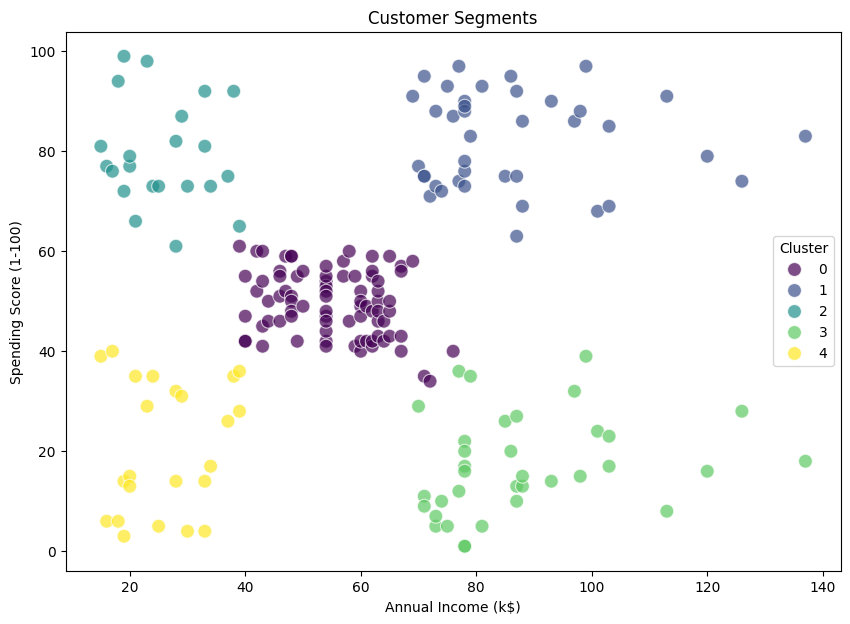

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Load the dataset
url = "Mall_Customers.csv"
data = pd.read_csv(url)

# Select the features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add the cluster labels to the dataset
data['Cluster'] = y_kmeans

# Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


### Optimal Number of Clusters: Elbow Method and Silhouette Score
## Task: 
#### Use the Elbow Method and Silhouette Score to find the optimal number of clusters for the Mall Customers dataset. Discuss the criteria for selecting the number of clusters.


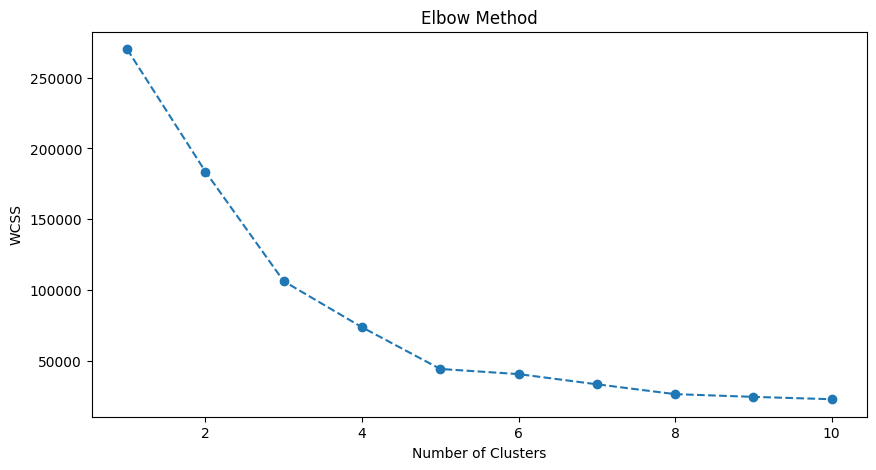

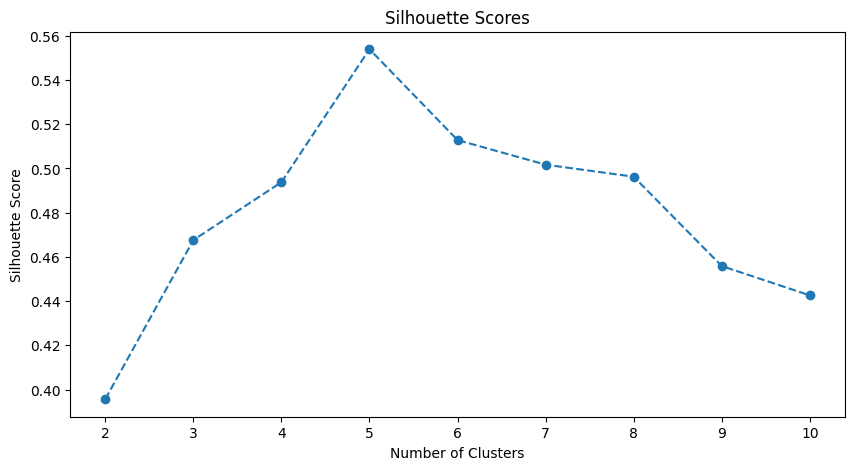

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

# Load the dataset
url = "Mall_Customers.csv"
data = pd.read_csv(url)

# Select the features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Determine the optimal number of clusters using the silhouette score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


### Cluster Profiling and Insights
## Task: 
#### Analyze the characteristics of the clusters formed in the Mall Customers dataset. Provide insights into the customer segments based on their spending behavior and income levels.


   Annual Income (k$)  Spending Score (1-100)  Cluster
0           55.296296               49.518519        0
1           86.538462               82.128205        1
2           25.727273               79.363636        2
3           88.200000               17.114286        3
4           26.304348               20.913043        4
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


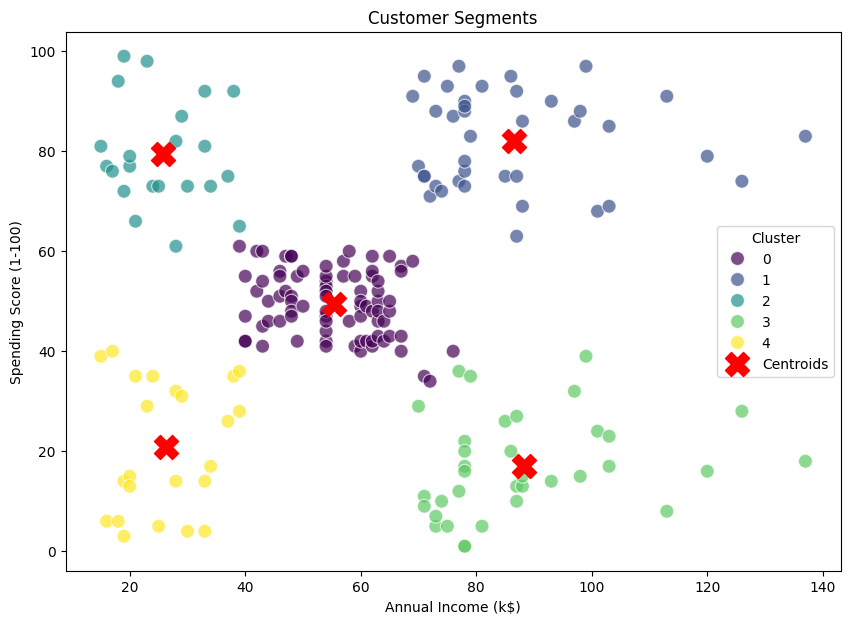

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Load the dataset
url = "Mall_Customers.csv"
data = pd.read_csv(url)

# Select the features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Apply K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add the cluster labels to the dataset
data['Cluster'] = y_kmeans

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Create a DataFrame for centroids for better readability
centroid_df = pd.DataFrame(centroids, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
centroid_df['Cluster'] = range(5)

# Display the centroids
print(centroid_df)

# Select only numeric columns for cluster summary
numeric_columns = ['Annual Income (k$)', 'Spending Score (1-100)']
cluster_summary = data.groupby('Cluster')[numeric_columns].mean()
print(cluster_summary)

# Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


### Hierarchical Clustering for Customer Segmentation
## Task: 
#### Implement hierarchical clustering on the Mall Customers dataset. Compare the clusters formed with those obtained from K-Means and discuss the differences.


K-Means Centroids:
   Annual Income (k$)  Spending Score (1-100)  Cluster
0           55.296296               49.518519        0
1           86.538462               82.128205        1
2           25.727273               79.363636        2
3           88.200000               17.114286        3
4           26.304348               20.913043        4
K-Means Cluster Summary:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


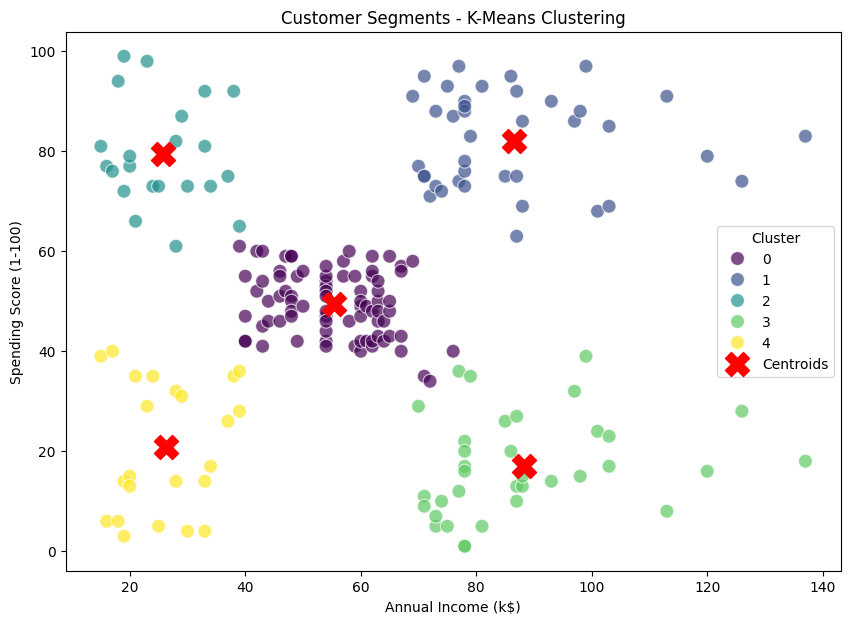

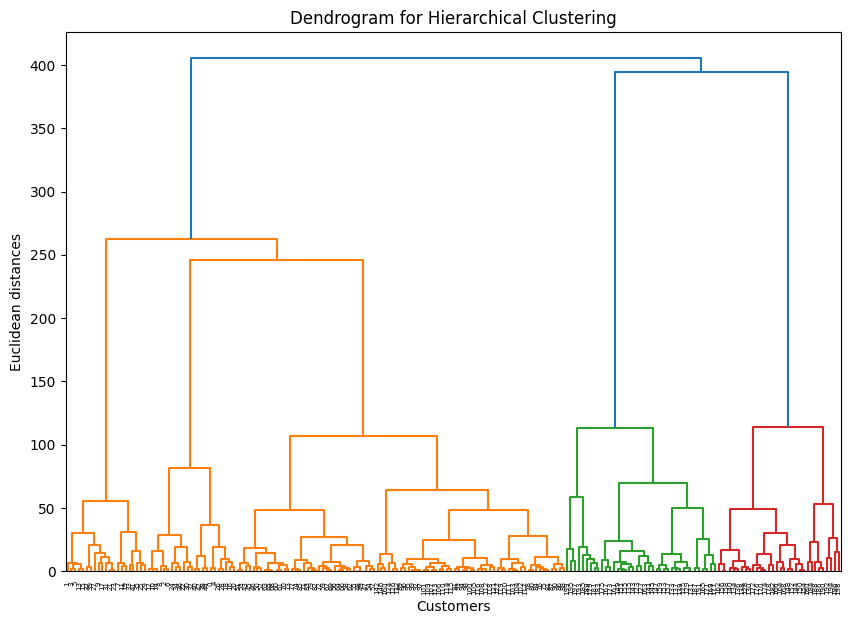

Hierarchical Cluster Summary:
          Annual Income (k$)  Spending Score (1-100)
HCluster                                            
1                  25.095238               80.047619
2                  26.304348               20.913043
3                  55.811765               49.129412
4                  86.538462               82.128205
5                  89.406250               15.593750


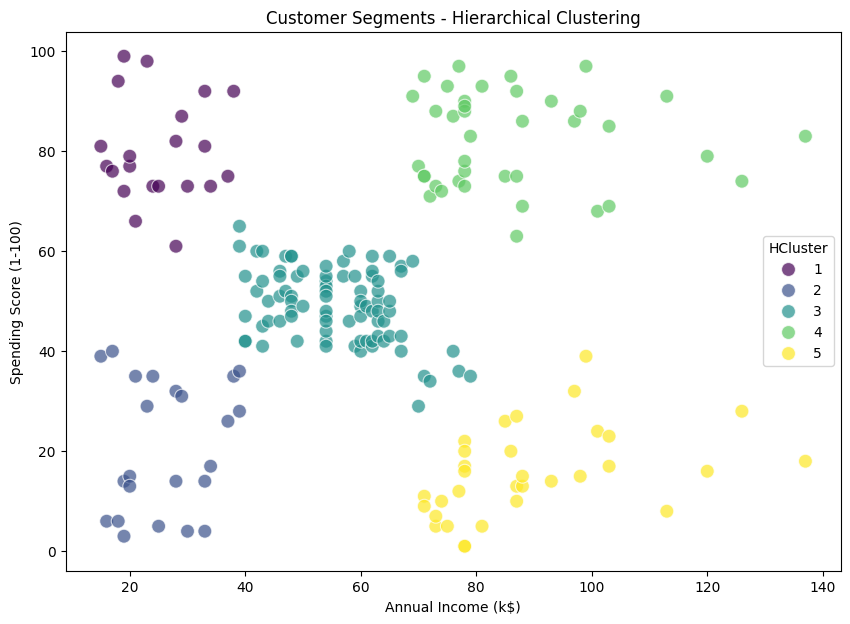

K-Means Centroids:
   Annual Income (k$)  Spending Score (1-100)  Cluster
0           55.296296               49.518519        0
1           86.538462               82.128205        1
2           25.727273               79.363636        2
3           88.200000               17.114286        3
4           26.304348               20.913043        4
K-Means Cluster Summary:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043
Hierarchical Cluster Summary:
          Annual Income (k$)  Spending Score (1-100)
HCluster                                            
1                  25.095238               80.047619
2                  26.304348               20.913043
3                  5

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load the dataset
url = "Mall_Customers.csv"
data = pd.read_csv(url)

# Select the features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Apply K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add the cluster labels to the dataset
data['Cluster'] = y_kmeans

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Create a DataFrame for centroids for better readability
centroid_df = pd.DataFrame(centroids, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
centroid_df['Cluster'] = range(5)

# Display the centroids
print("K-Means Centroids:")
print(centroid_df)

# Display the characteristics of each K-Means cluster
kmeans_summary = data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("K-Means Cluster Summary:")
print(kmeans_summary)

# Visualize K-Means clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Customer Segments - K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


# Perform hierarchical/agglomerative clustering
linked = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Form clusters using the determined cut-off
hclusters = fcluster(linked, 5, criterion='maxclust')

# Add the cluster labels to the dataset
data['HCluster'] = hclusters

# Display the characteristics of each hierarchical cluster
hclust_summary = data.groupby('HCluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("Hierarchical Cluster Summary:")
print(hclust_summary)

# Visualize hierarchical clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='HCluster', palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segments - Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='HCluster')
plt.show()

# Display the centroids
print("K-Means Centroids:")
print(centroid_df)

# Display the characteristics of each K-Means cluster
print("K-Means Cluster Summary:")
print(kmeans_summary)

# Display the characteristics of each hierarchical cluster
print("Hierarchical Cluster Summary:")
print(hclust_summary)


### Visualizing Clusters with PCA
## Task: 
####  Apply PCA to the Mall Customers dataset to reduce its dimensionality. Visualize the clusters from both K-Means and hierarchical clustering in the PCA-reduced space.


Explained variance ratio: [0.50981041 0.49018959]


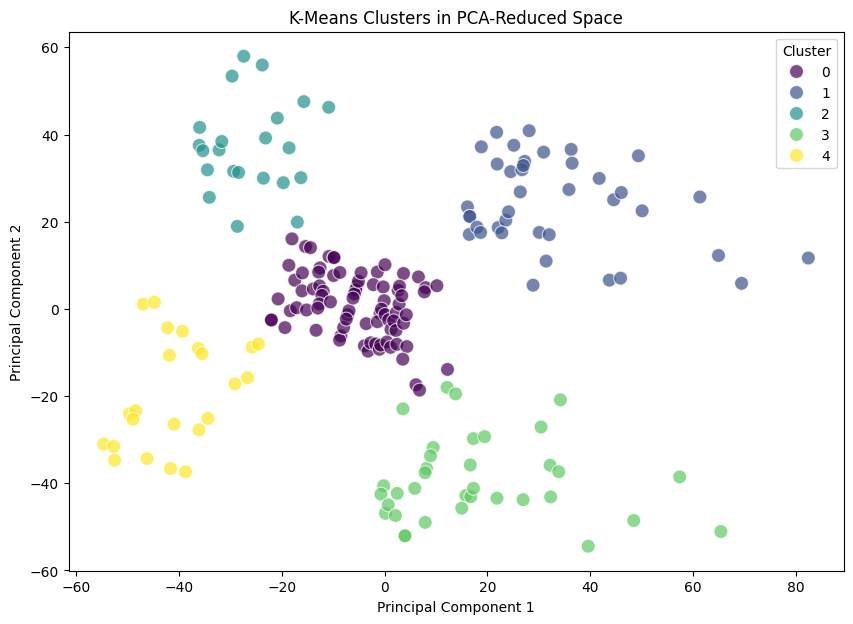

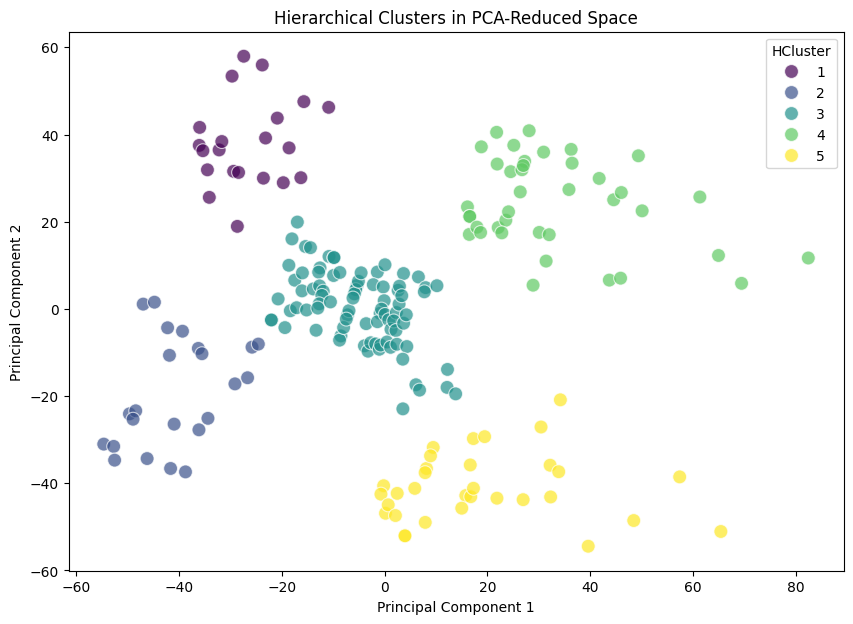

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA

# Load the dataset
url = "Mall_Customers.csv"
data = pd.read_csv(url)

# Select the features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Apply K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add the cluster labels to the dataset
data['Cluster'] = y_kmeans

# Perform hierarchical/agglomerative clustering
linked = linkage(X, method='ward')

# Form clusters using the determined cut-off
hclusters = fcluster(linked, 5, criterion='maxclust')

# Add the cluster labels to the dataset
data['HCluster'] = hclusters

# Apply PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Add the PCA components to the dataset
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]

# Print explained variance ratio to understand how much variance is captured
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Visualize K-Means clusters in PCA-reduced space
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clusters in PCA-Reduced Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Visualize hierarchical clusters in PCA-reduced space
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='HCluster', palette='viridis', s=100, alpha=0.7)
plt.title('Hierarchical Clusters in PCA-Reduced Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='HCluster')
plt.show()
